# Import packages

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import classification_report
random.seed(42)
np.random.seed(42)

In [2]:
# !pip install xgboost
# !pip install catboost

In [3]:
df = pd.read_excel('default of credit card clients.xls')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Exploring dataset

In [6]:
df = df.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
print('outcome label=0:' + str(len(df[df['def_pay']==0].values)/len(df)))
print('outcome label=1:' + str(len(df[df['def_pay']==1].values)/len(df)))

outcome label=0:0.7788
outcome label=1:0.2212


In [8]:
df.head()
df = shuffle(df, random_state=42)

# Fixed some columns

In [9]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [10]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [12]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

In [13]:
df['SE_MA'] = df.SEX * df.MARRIAGE
df['SE_MA_2'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
del df['SE_MA']
df = df.rename(columns={'SE_MA_2': 'SE_MA'})

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,SE_MA
2308,2309,30000,1,2,2,25,0,0,0,0,0,0,8864,10062,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000,0,2
22404,22405,150000,2,1,2,26,0,0,0,0,0,0,136736,125651,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669,0,5
23397,23398,70000,2,3,1,32,0,0,0,0,0,0,70122,69080,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554,0,4
25058,25059,130000,1,3,2,49,0,0,0,0,0,0,20678,18956,16172,16898,11236,6944,1610,1808,7014,27,7011,4408,0,2
2664,2665,50000,2,2,2,36,0,0,0,0,0,2,94228,47635,42361,19574,20295,19439,2000,1500,1000,1800,0,1000,1,5


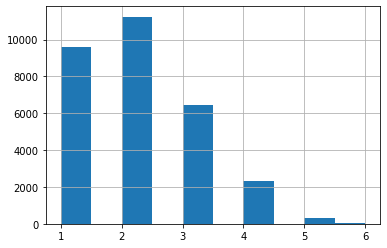

In [15]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

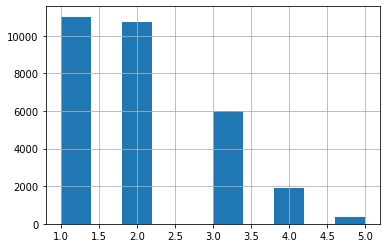

In [16]:
df['AgeBin'] = pd.cut(df['AGE'], 6, labels = [1, 2, 3, 4, 5, 6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df['AgeBin'] = pd.to_numeric(df['AgeBin'])
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5
df.AgeBin.hist()

In [17]:
df['SE_AG'] = 0
df.loc[((df.SEX == 1) & (df.AgeBin == 1)) , 'SE_AG'] = 1 # man in 20's
df.loc[((df.SEX == 1) & (df.AgeBin == 2)) , 'SE_AG'] = 2 # man in 30's
df.loc[((df.SEX == 1) & (df.AgeBin == 3)) , 'SE_AG'] = 3 # man in 40's
df.loc[((df.SEX == 1) & (df.AgeBin == 4)) , 'SE_AG'] = 4 # man in 50's
df.loc[((df.SEX == 1) & (df.AgeBin == 5)) , 'SE_AG'] = 5 # man in 60's and above
df.loc[((df.SEX == 2) & (df.AgeBin == 1)) , 'SE_AG'] = 6 # woman in 20's
df.loc[((df.SEX == 2) & (df.AgeBin == 2)) , 'SE_AG'] = 7 # woman in 30's
df.loc[((df.SEX == 2) & (df.AgeBin == 3)) , 'SE_AG'] = 8 # woman in 40's
df.loc[((df.SEX == 2) & (df.AgeBin == 4)) , 'SE_AG'] = 9 # woman in 50's
df.loc[((df.SEX == 2) & (df.AgeBin == 5)) , 'SE_AG'] = 10 # woman in 60's and above

# Preparing Datasets

In [18]:
import math

cols_1 = ['AGE', 'SEX', 'EDUCATION', 'MARRIAGE']
cols_2 = ['PAY_1', 'PAY_2', 'PAY_3',
          'PAY_4', 'PAY_5', 'PAY_6']

new_cols = []
for i in cols_1:
    for j in cols_2:
        df[i+j] = np.sqrt(df[i]*df[j])
        new_cols.append(i+j)

In [19]:
for i in range(1,7):
    for j in range(1, 7):
        if i == j:
            continue
        df['PAY_' + str(i) + '_' + str(j)] = 0
        df['PAY_' + str(i) + '_' + str(j)] = np.sqrt(df['PAY_' + str(i)]*df['PAY_' + str(j)])
        new_cols.append('PAY_' + str(i) + '_' + str(j))

df['PAY']  = np.sqrt(df['PAY_1']*df['PAY_2']*df['PAY_3']*df['PAY_4']*df['PAY_5']*df['PAY_6'])
new_cols.append('PAY')

In [20]:
features = ['LIMIT_BAL', 
            # 'PAY_1','PAY_2', 'PAY_3', 
            # 'PAY_4', 'PAY_5', 'PAY_6',
            'BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4',
            'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            # 'SE_MA', 'AgeBin', 'SE_AG'
            ]
features.extend(new_cols)
cat_features = ['PAY_1', 'PAY_2', 'PAY_3',
                'AGE', 'SEX', 'EDUCATION', 'MARRIAGE',
                'PAY_4', 'PAY_5', 'PAY_6',
                'SE_MA', 'AgeBin', 'SE_AG']
y = df['def_pay'].values.copy() # target
X = df[features].copy()
X_cat = df[cat_features]

X_non_cat = X[[f for f in features if f not in cat_features]].values
X_cat = X_cat.values

In [21]:
y.shape

(30000,)

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
#                                                     random_state=42,
#                                                     stratify=y)
X_cat_train, X_cat_test, X_non_cat_train, X_non_cat_test, y_train, y_test = train_test_split(X_cat, X_non_cat, y, test_size=0.30,
                                                                        random_state=42,
                                                                        stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
#                                                     random_state=42,
#                                                     stratify=y)

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax = MinMaxScaler()
minmax.fit(X_non_cat_train)
X_non_cat_train = minmax.transform(X_non_cat_train)
X_non_cat_test = minmax.transform(X_non_cat_test)

In [24]:
X_train = np.concatenate([X_non_cat_train, X_cat_train], axis=1)
X_test = np.concatenate([X_non_cat_test, X_cat_test], axis=1)

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


32710


In [26]:
X_train = X_SMOTE
y_train = y_SMOTE

In [27]:
print(X_train.shape)
print(y_train.shape)

(32710, 81)
(32710,)


# Model tunning

In [28]:
def search_for_best_models(clf, params, X_train, y_train, scoring='f1_weighted', cv=4):
    optimal_models = RandomizedSearchCV(clf,
                            param_distributions=params,
                            cv=cv, n_jobs=-1,
                            random_state=42,
                            n_iter=10,
                            scoring=scoring)
    optimal_models.fit(X_train, y_train)

    return (optimal_models.best_params_,
            optimal_models.best_estimator_)


#Logistic Regression

In [29]:
params = {"C": np.logspace(-100, 100, 10000),
          "max_iter": [200],
          "penalty": ["l2", 'None'],
          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
      }

In [30]:
optimal_params, optimal_models = search_for_best_models(LogisticRegression(),
                                     params,
                                     X_train,
                                     y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, 
                         C=optimal_params['C'],
                         penalty=optimal_params['penalty'],
                         solver=optimal_params['solver'],
                         fit_intercept=True,
                         n_jobs=4)

In [32]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=537.3695175425777, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
print(auc(fpr, tpr))
print(f1_score(y_test, y_predict))
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.7667777777777778
0.7089464654004798
0.534486582390774
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      7009
           1       0.48      0.61      0.53      1991

    accuracy                           0.77      9000
   macro avg       0.68      0.71      0.69      9000
weighted avg       0.79      0.77      0.78      9000



In [35]:
for average in ['micro', 'macro','weighted', 'binary']:
    print('average:' + average)
    print(f1_score(y_test, y_predict, average=average))

average:micro
0.7667777777777778
average:macro
0.6894506887196624
average:weighted
0.775851787115036
average:binary
0.534486582390774


#Decision Tree

In [36]:
params = {"max_depth": ['None', 2, 3, 5, 10, 15],
        "min_samples_split": [2, 3, 5, 10],
        "min_samples_leaf": [1, 2, 3, 5],
        "max_features": ['auto', 'sqrt', 'None', 2, 4, 5, 9, 10, 15, 18]
      }

In [37]:
optimal_params, optimal_models = search_for_best_models(DecisionTreeClassifier(),
                                     params,
                                     X_train,
                                     y_train)

In [38]:
model = DecisionTreeClassifier(max_depth=optimal_params['max_depth'],
                               min_samples_split=optimal_params['min_samples_split'],
                               min_samples_leaf=optimal_params['min_samples_leaf'],
                               max_features=optimal_params['max_features'],
                               random_state=42)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [40]:
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
print(auc(fpr, tpr))
print(f1_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print(classification_report(y_test, y_predict))

Accuracy Score is 0.71167
0.6413803978367772
0.44157520981278237
      0     1
0  5379  1630
1   965  1026
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      7009
           1       0.39      0.52      0.44      1991

    accuracy                           0.71      9000
   macro avg       0.62      0.64      0.62      9000
weighted avg       0.75      0.71      0.73      9000



In [41]:
for average in ['micro', 'macro','weighted', 'binary']:
    print('average:' + average)
    print(f1_score(y_test, y_predict, average=average))

average:micro
0.7116666666666667
average:macro
0.6236184294402038
average:weighted
0.7251176378946927
average:binary
0.44157520981278237


#RandomForest

In [42]:
random.seed(42)
np.random.seed(42)
params = {
    'n_estimators':[50, 100, 200,
                    300, 500, 1000],
    "max_features": ['auto', 'sqrt', 'None', 2, 4, 5, 9, 10, 15, 18],
    'max_depth':[None, 2, 5, 8, 10],
    'min_samples_split': [2, 3, 5],
    'criterion': ['gini', 'entropy']
}

In [43]:
optimal_params, optimal_models = search_for_best_models(
    clf=RandomForestClassifier(), params=params,
    X_train=X_train, y_train=y_train)

In [44]:
model = RandomForestClassifier(n_estimators=optimal_params['n_estimators'],
                              max_depth=optimal_params['max_depth'],
                              max_features=optimal_params['max_features'],
                               min_samples_leaf=optimal_params['min_samples_split'],
                               random_state=42)

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [46]:
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
print(auc(fpr, tpr))
print(f1_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print(classification_report(y_test, y_predict))

Accuracy Score is 0.80211
0.6883014154363777
0.5198166621730924
      0    1
0  6255  754
1  1027  964
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7009
           1       0.56      0.48      0.52      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.69      0.70      9000
weighted avg       0.79      0.80      0.80      9000



In [47]:
for average in ['micro', 'macro','weighted', 'binary']:
    print('average:' + average)
    print(f1_score(y_test, y_predict, average=average))

average:micro
0.8021111111111111
average:macro
0.697596386506041
average:weighted
0.7967184594730118
average:binary
0.5198166621730924


#SVM

In [48]:
import scipy
svm_params = {'C': scipy.stats.expon(scale=1.), 
          'gamma': scipy.stats.expon(scale=.1),
          'kernel': ['rbf'], 
          'class_weight':[None]}

In [49]:
optimal_params, optimal_models = search_for_best_models(SVC(), svm_params,
                                                        X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [50]:
model = SVC(C=optimal_params['C'],
          gamma=optimal_params['gamma'],
          kernel=optimal_params['kernel'],
          class_weight=optimal_params['class_weight'],
          random_state=42)

In [51]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
print(auc(fpr, tpr))
print(f1_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print(classification_report(y_test, y_predict))

Accuracy Score is 0.76833
0.6968202753452026
0.5205794435502414
      0     1
0  5783  1226
1   859  1132
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7009
           1       0.48      0.57      0.52      1991

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.68      9000
weighted avg       0.78      0.77      0.77      9000



In [52]:
for average in ['micro', 'macro','weighted', 'binary']:
    print('average:' + average)
    print(f1_score(y_test, y_predict, average=average))

average:micro
0.7683333333333333
average:macro
0.6839216901290874
average:weighted
0.7749940671660485
average:binary
0.5205794435502414


# Extra Trees

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
random.seed(42)
np.random.seed(42)
params = {
    'n_estimators':[50, 100, 200,
                    300, 500, 1000],
    "max_features": ['auto', 'sqrt', 'None', 2, 4, 5, 9, 10, 15, 18],
    'max_depth':[None, 2, 5, 8, 10],
    'min_samples_split': [2, 3, 5],
    'criterion': ['gini', 'entropy']
}

In [54]:
optimal_params, optimal_models = search_for_best_models(
    clf=RandomForestClassifier(), params=params,
    X_train=X_train, y_train=y_train)

In [55]:
model = ExtraTreesClassifier(n_estimators=optimal_params['n_estimators'],
                              max_depth=optimal_params['max_depth'],
                              max_features=optimal_params['max_features'],
                               min_samples_leaf=optimal_params['min_samples_split'],
                               random_state=42)

In [56]:
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=15,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [57]:
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
print(auc(fpr, tpr))
print(f1_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print(classification_report(y_test, y_predict))

Accuracy Score is 0.79411
0.664646459072962
0.4816783216783217
      0    1
0  6286  723
1  1130  861
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7009
           1       0.54      0.43      0.48      1991

    accuracy                           0.79      9000
   macro avg       0.70      0.66      0.68      9000
weighted avg       0.78      0.79      0.79      9000



In [58]:
for average in ['micro', 'macro','weighted', 'binary']:
    print('average:' + average)
    print(f1_score(y_test, y_predict, average=average))

average:micro
0.7941111111111111
average:macro
0.6766103913417605
average:weighted
0.7852958497385535
average:binary
0.4816783216783217


# Gradient Boosting

In [59]:
np.random.seed(42)
params = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1., 2.],
    'n_estimators':[50, 100, 200,
                    300, 500, 1000],
    "max_features": ['auto', 'sqrt', 'None', 2, 4, 5, 9, 10, 15, 18],
    'max_depth':[None, 2, 5, 8, 10],
    'min_samples_split': [2, 3, 5],
    'criterion': ['friedman_mse', 'mse']
}

In [60]:
optimal_params, optimal_models = search_for_best_models(
    clf=GradientBoostingClassifier(), params=params,
    X_train=X_train, y_train=y_train)

In [61]:
model = GradientBoostingClassifier(n_estimators=optimal_params['n_estimators'],
                        loss=optimal_params['loss'],
                        learning_rate=optimal_params['learning_rate'],
                        max_depth=optimal_params['max_depth'],
                        max_features=optimal_params['max_features'],
                        min_samples_leaf=optimal_params['min_samples_split'],
                        random_state=42)

In [62]:
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=None,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
print(auc(fpr, tpr))
print(f1_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print(classification_report(y_test, y_predict))

Accuracy Score is 0.80333
0.668230105814301
0.4893248701673399
      0    1
0  6382  627
1  1143  848
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7009
           1       0.57      0.43      0.49      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.67      0.68      9000
weighted avg       0.79      0.80      0.79      9000



In [64]:
for average in ['micro', 'macro','weighted', 'binary']:
    print('average:' + average)
    print(f1_score(y_test, y_predict, average=average))

average:micro
0.8033333333333333
average:macro
0.6837707328681752
average:weighted
0.7921851038718187
average:binary
0.4893248701673399


#XGBOOST

In [78]:
param_grid = {
     'max_depth': [2, 4, 5, 8, 12, 15],
     'learning_rate': [0.001, 0.01, 0.1, 0.2],
     'gamma': [0.01, 0.1, 0.25, 0.5],
     'reg_lambda': [10.0, 20., 50., 100.],
      'scale_pos_weight': [1]}

In [79]:
optimal_params = RandomizedSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', 
    seed=42, subsample=0.9,
    colsample_bytree=0.5),
    param_distributions=param_grid,
    scoring='f1_weighted',
    n_jobs=-1, cv=5)

In [67]:
optimal_params.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.5, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1,...
                                           seed=42, silent=None, subsample=0.9,
                                           verbosity=1),
                   iid='deprecated', n_it

In [68]:
params = optimal_params.best_params_

In [69]:
model = XGBClassifier(objective='binary:logistic',
                        gamma=params['gamma'],
                        learn_rate=params['learning_rate'],
                        max_depth=params['max_depth'],
                        reg_lambda=params['reg_lambda'],
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        seed=42,
                        n_jobs=4)

In [70]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.01,
              learn_rate=0.1, learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=50.0, scale_pos_weight=1, seed=42,
              silent=None, subsample=0.9, verbosity=1)

In [71]:
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
print(auc(fpr, tpr))
print(f1_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print(classification_report(y_test, y_predict))

Accuracy Score is 0.80967
0.6787688627931125
0.5079000287273773
      0    1
0  6403  606
1  1107  884
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7009
           1       0.59      0.44      0.51      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.68      0.69      9000
weighted avg       0.80      0.81      0.80      9000



In [72]:
for average in ['micro', 'macro','weighted', 'binary']:
    print('average:' + average)
    print(f1_score(y_test, y_predict, average=average))

average:micro
0.8096666666666666
average:macro
0.6949583482709826
average:weighted
0.7992537535454061
average:binary
0.5079000287273773


#Voting

In [80]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators=[('rf',
                    RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)),
                ('XGBoost', 
                        XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                            colsample_bynode=1, colsample_bytree=0.5, gamma=0.01,
                            learn_rate=0.1, learning_rate=0.1, max_delta_step=0, max_depth=15,
                            min_child_weight=1, missing=None, n_estimators=100, n_jobs=4,
                            nthread=None, objective='binary:logistic', random_state=0,
                            reg_alpha=0, reg_lambda=50.0, scale_pos_weight=1, seed=42,
                            silent=None, subsample=0.9, verbosity=1)),
              ('lr',
                    LogisticRegression(C=537.3695175425777, class_weight=None, dual=False,
                        fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                        max_iter=100, multi_class='auto', n_jobs=4, penalty='l2',
                        random_state=42, solver='sag', tol=0.0001, verbose=0,
                        warm_start=False))
                  ],
                voting='soft',
                weights=[2, 1, 1],
                n_jobs=4
)

In [81]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=9,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
             

In [82]:
from sklearn.metrics import classification_report
y_predict = voting.predict(X_test)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7009
           1       0.57      0.51      0.54      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.70      0.71      9000
weighted avg       0.80      0.81      0.80      9000



In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
print(auc(fpr, tpr))
print(f1_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print(classification_report(y_test, y_predict))

0.6988889007524873
0.5361317747077577
      0     1
0  6245   764
1   982  1009
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7009
           1       0.57      0.51      0.54      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.70      0.71      9000
weighted avg       0.80      0.81      0.80      9000



In [84]:
for average in ['micro', 'macro','weighted', 'binary']:
    print('average:' + average)
    print(f1_score(y_test, y_predict, average=average))

average:micro
0.806
average:macro
0.7067424819029096
average:weighted
0.8018674295368285
average:binary
0.5361317747077577
